# Dataset Information

Given a set of features extracted from the shape of the beans in images and  it's required to predict the class of a bean given some features about its shape.
There are 7 bean types in this dataset.

**Data fields**
- ID - an ID for this instance
- Area - (A), The area of a bean zone and the number of pixels within its boundaries.
- Perimeter - (P), Bean circumference is defined as the length of its border.
- MajorAxisLength - (L), The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength - (l), The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRatio - (K), Defines the relationship between L and l.
- Eccentricity - (Ec), Eccentricity of the ellipse having the same moments as the region.
- ConvexArea - (C), Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter - (Ed), The diameter of a circle having the same area as a bean seed area.
- Extent - (Ex), The ratio of the pixels in the bounding box to the bean area.
- Solidity - (S), Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness - (R), Calculated with the following formula: (4piA)/(P^2)
- Compactness - (CO), Measures the roundness of an object: Ed/L
- ShapeFactor1 - (SF1)
- ShapeFactor2 - (SF2)
- ShapeFactor3 - (SF3)
- ShapeFactor4 - (SF4)
- y - the class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.


In [68]:
#!pip install flaml
#pip install imbalanced-learn



<img src= "https://www.thespruceeats.com/thmb/eeIti36pfkoNBaipXrTHLjIv5YA=/1888x1416/smart/filters:no_upscale()/DriedBeans-56f6c2c43df78c78418c3b46.jpg" alt ="Titanic" style='width: 800px;height:400px'>

# 1: Import Libraries

In [69]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [70]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting
from sklearn.metrics import confusion_matrix

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.metrics import ConfusionMatrixDisplay
#from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


# for path
import os

# 2: Reading the Dataset

In [71]:
train = pd.read_csv( 'train.csv')
print("The shape of the dataset is {}.\n\n".format(train.shape))

The shape of the dataset is (10834, 18).




# 3- Explainatry Data Analysis - EDA

In [72]:
# Shape or Size
train.shape

(10834, 18)

**The shape of the dataset is (10834, 18) , containing 17 Features beside (Y / Bean Class)**

In [73]:
#Dataset information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

**The features are all numerical but (Y / Bean Class)**
<br>
**No Nullable Data**

In [74]:
train['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

## Detect  outliers in the dataset

In [75]:
# Detect  outliers in the dataset
from collections import Counter

def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        Q1 = np.percentile(df[c], 25)
        Q3 = np.percentile(df[c], 75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step)
                              | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)

    return multiple_outliers


In [76]:
# train = train.drop(detect_outliers(train,['Area', 'Perimeter', 'MajorAxisLength',
#                                                    'MinorAxisLength', 'AspectRation', 'Eccentricity',
#                                                    'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity',
#                                                    'roundness', 'Compactness', 'ShapeFactor1',
#                                                    'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']), 
#                          axis=0).reset_index(drop=True)

# print('Number of of samples in the dataset after removing outliers: %d' % len(train))

# split X and Y

In [77]:
from imblearn.over_sampling import SMOTE


train = train.drop('ID', axis=1)
X = train.drop("y", axis=1)
Y = train['y']
su = SMOTE(random_state=42)
X, Y = su.fit_resample(X, Y)


# Normlization


In [78]:
from sklearn import preprocessing
labelEncoder=preprocessing.LabelEncoder().fit(Y)
label_Y = labelEncoder.transform(Y)
print(X.head())
standardScale= preprocessing.StandardScaler().fit(X)
norm_X =standardScale.transform(X)
norm_X


    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  58238    971.303       397.202654       186.945510      2.124697   
1  44515    757.601       265.590470       213.967453      1.241266   
2  31662    653.783       239.902428       168.421505      1.424417   
3  38778    734.020       268.446281       184.061923      1.458456   
4  42530    775.403       281.212824       193.236878      1.455275   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.882317       58977     272.306674  0.604756  0.987470   0.775723   
1      0.592420       44780     238.071960  0.771745  0.994082   0.974620   
2      0.712136       32034     200.781748  0.801407  0.988387   0.930853   
3      0.727925       39208     222.201897  0.766137  0.989033   0.904439   
4      0.726511       43028     232.703412  0.729816  0.988426   0.888895   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.685561      0.006820      0.0

array([[-2.53982540e-01, -7.00422065e-04,  2.92806460e-01, ...,
        -9.92200922e-01, -1.71533710e+00,  9.59638612e-01],
       [-5.49109656e-01, -7.18989879e-01, -8.48430552e-01, ...,
         1.36167277e+00,  1.71790373e+00,  6.74764702e-01],
       [-8.25526533e-01, -1.06794017e+00, -1.07117698e+00, ...,
         1.22669583e+00,  6.57026526e-01,  7.60219390e-01],
       ...,
       [-5.69196278e-01, -5.99349818e-01, -5.60560985e-01, ...,
         1.54045844e-01, -1.55017875e-01, -2.27720650e-01],
       [-5.46442909e-01, -5.62185234e-01, -5.58047213e-01, ...,
         2.10947363e-01, -1.20833564e-02,  6.28274220e-01],
       [-7.15071614e-01, -8.60518594e-01, -8.71081845e-01, ...,
         7.88550293e-01,  4.21435647e-01,  5.86393428e-01]])

**Number of instancs for each class , Dermason has the highest number.**

# Data Visualization
**Heatmap**

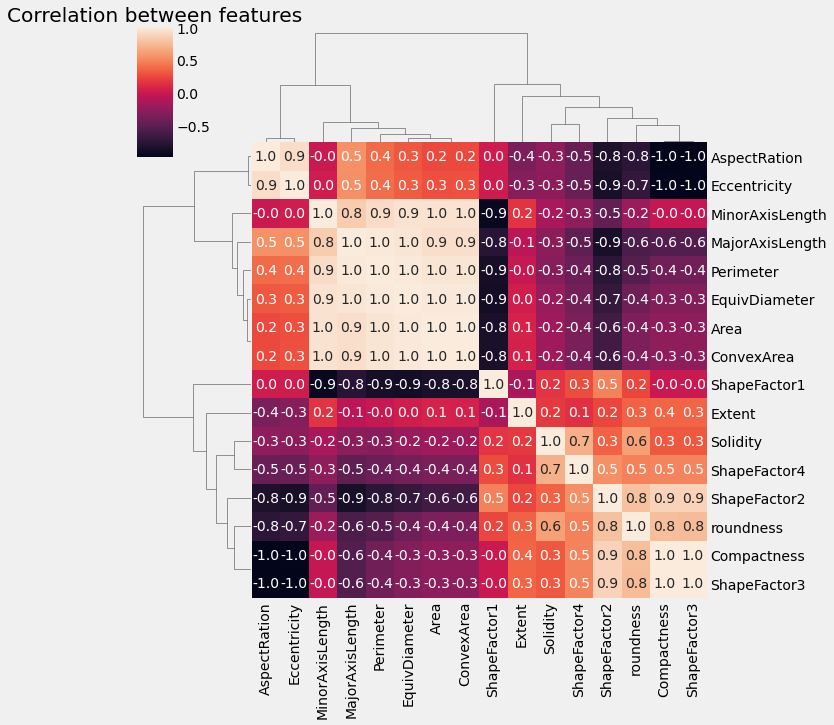

In [79]:
corr_matrix = train.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".1f")
plt.title("Correlation between features")
plt.show()


# PCA

In [80]:
# Visualizing the Principal Components in the feature space
from sklearn.decomposition import PCA
pca = PCA().fit(norm_X)
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC" + str(i) for i in list(range(1, num_pc + 1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')


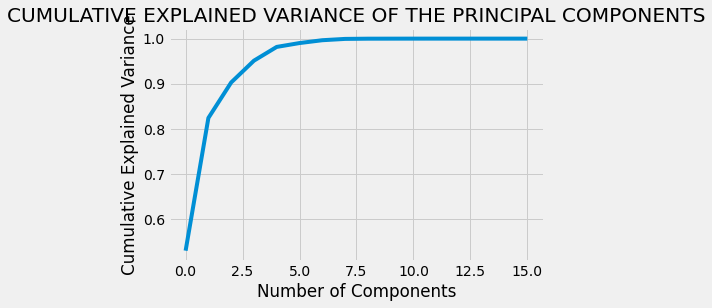

In [81]:
# Screeplot of Principal Components
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_])

# 2D Bi-plot of Principal Components
pca_scores = PCA().fit_transform(X)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
               var2=round(pca.explained_variance_ratio_[1]*100, 2), 
               colorlist=Y)


# Cumulative Explained Variance Plot
plt.plot(np.cumsum(pca.explained_variance_ratio_)); 
plt.title('CUMULATIVE EXPLAINED VARIANCE OF THE PRINCIPAL COMPONENTS')
plt.xlabel('Number of Components'); 
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [82]:
pca=PCA(n_components=5).fit(norm_X)
X_train=pca.transform(norm_X)

**From the graph above, Linear and log relations can be detected.**

**Next step will be Detecting how Beans classes can be effected by many features ..**

- A perimeter is  a path that encompasses/surrounds/outlines a shape or its length. 'Wikipedia'
- The above graph shows that (BOMBAY) has the highest perimeter

## Data Splitting

Now it's time to split the dataset for the training step. Typically the dataset is split into 3 subsets, namely, the training, validation and test sets. In our case, the test set is already predefined. So we'll split the "training" set into training and validation sets with 0.8:0.2 ratio. 


In [83]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X_train, label_Y, test_size=0.2, random_state=12, shuffle=True)
#test_x, val_x, test_y, val_y = train_test_split(test_x, test_y, test_size=0.5, random_state=12, shuffle=True)

# 4- Feature Engineering

In [84]:
### Tensorflow and Keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

## Model Training


Let's train a model with the data!

In [85]:
# model = Sequential()
# model.add(Dense(512, activation='relu', input_shape=(6,)))
# model.add(Dropout(0.2))
# model.add(Dense(256, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(64, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(7, activation='softmax'))

In [86]:
# model.compile(optimizer=Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999),
#               loss='sparse_categorical_crossentropy', 
#               metrics=['accuracy'])

# early_stopp = EarlyStopping(patience=6, restore_best_weights=True, monitor='val_loss')

# history = model.fit(train_x, train_y, epochs=100, 
#                     validation_data=(val_x, val_y), 
#                     batch_size=32)

In [87]:
from catboost import CatBoostClassifier


In [104]:
model = CatBoostClassifier(
    
                            border_count=100,
    
                            iterations=2225,
    
                            learning_rate=0.03001,

                              depth=4 ,

                           l2_leaf_reg=10,
    
    
    
                         loss_function= 'MultiClass',

                         eval_metric='Accuracy',
                              
                          verbose=False,
                          
                          task_type='CPU',
    
                            random_state=42,
        
                             bagging_temperature=0.9,

                            random_strength= 10,
    
        
)


#model.fit(train_x, train_y)
model.fit(X_train, label_Y)


In [89]:
model.score(train_x, train_y)


0.956631207905835

In [90]:
from flaml import AutoML
model = AutoML()
model.fit(train_x, train_y, task='classification',
          metric='accuracy', time_budget=10)


[flaml.automl: 05-29 16:10:12] {2365} INFO - task = classification
[flaml.automl: 05-29 16:10:12] {2367} INFO - Data split method: stratified
[flaml.automl: 05-29 16:10:12] {2371} INFO - Evaluation method: holdout
[flaml.automl: 05-29 16:10:12] {2448} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 05-29 16:10:12] {2561} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 05-29 16:10:12] {2853} INFO - iteration 0, current learner lgbm
[flaml.automl: 05-29 16:10:12] {2983} INFO - Estimated sufficient time budget=360s. Estimated necessary time budget=9s.
[flaml.automl: 05-29 16:10:12] {3030} INFO -  at 0.1s,	estimator lgbm's best error=0.1154,	best estimator lgbm's best error=0.1154
[flaml.automl: 05-29 16:10:12] {2853} INFO - iteration 1, current learner lgbm
[flaml.automl: 05-29 16:10:12] {3030} INFO -  at 0.1s,	estimator lgbm's best error=0.1154,	best estimator lgbm's best error=0.1154
[flaml.

In [91]:
print('Best ML Model:', model.best_estimator)
print('Best hyperparmeter config:', model.best_config)
print('Best accuracy on validation data: %f' % (1 - model.best_loss))
print('Training duration of best run: %f s' % (model.best_config_train_time))


Best ML Model: extra_tree
Best hyperparmeter config: {'n_estimators': 25, 'max_features': 1.0, 'max_leaves': 289, 'criterion': 'gini'}
Best accuracy on validation data: 0.952351
Training duration of best run: 0.226983 s


In [92]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier(n_estimators= 243, max_features= 0.788353852964382, criterion='gini')
model.fit(train_x, train_y)


ExtraTreesClassifier(max_features=0.788353852964382, n_estimators=243)

In [93]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=80, degree=7)
model.fit(train_x, train_y)


SVC(C=80, degree=7)

In [94]:
#from sklearn.random

In [95]:
#import lightgbm as lgb
#model = lgb.LGBMClassifier(
#    objective='multiclass', random_state=42, learning_rate=0.03, reg_alpha=0.0001)
#model.fit(train_x, train_y)



**Accuracy : is one of the simplest form of evaluation metrics , it means that how many data points are predicted correctly**

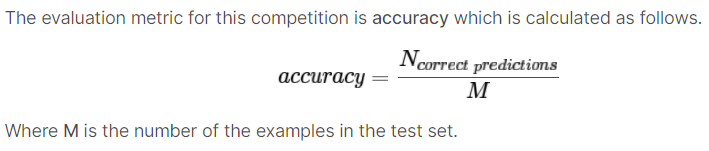

**The accuracy can be defined as the percentage of correctly classified instances (TP + TN)/(TP + TN + FP + FN). where TP, FN, FP and TN represent the number of true positives, false negatives, false positives and true negatives, respectively.**


In [105]:
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score,recall_score,precision_score
#y_pred=np.argmax(model.predict(test_x), axis=-1)
y_pred = model.predict(test_x)
#accuracy = r2_score(test_y, y_pred)
#print('r2_score = ', r2_score(test_y, y_pred))
print("Recall:", recall_score(test_y, y_pred,average="macro"))

print("Precision:", precision_score(test_y, y_pred,average="macro"))

print("F1-scoresn:",  f1_score(test_y, y_pred,average="macro"))
#print ( 'f1_score = ', accuracy)


Recall: 0.958286670467807
Precision: 0.9586645169218883
F1-scoresn: 0.9584037468063519


In [97]:
y_pred


array([3, 6, 0, ..., 4, 6, 0])

In [106]:
y_test = labelEncoder.inverse_transform(y_pred)
print(y_test)


['DERMASON' 'SIRA' 'SIRA' ... 'HOROZ' 'SIRA' 'BARBUNYA']


## Model Prediction 

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 


In [107]:

test = pd.read_csv( 'test.csv')
test.head()


,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


In [108]:
ID=pd.DataFrame(test['ID'])
print(ID.shape)
test = test.drop(columns=['ID'])


(2709, 1)


In [109]:
# Predicting y of Test data

# Step 1 - applying scalling
print(test.head())

X_test_scaled = standardScale.transform(test)

X_test_pca = pca.transform(X_test_scaled)
y_test_predicted =model.predict(X_test_pca)
#y_test_predicted = y_pred=np.argmax(model.predict(X_test_pca), axis=-1)
finallPredecit = labelEncoder.inverse_transform(y_test_predicted)
finallPredecit=finallPredecit.reshape(-1,1)

Data_=pd.DataFrame(finallPredecit)
Data__=pd.concat([ID,Data_],axis=1)


     Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0   57659    955.434       387.757607       196.625782      1.972059   
1   28772    630.362       229.990785       159.609367      1.440960   
2   54677    911.022       308.853903       226.398571      1.364204   
3   24827    578.304       214.192699       147.788172      1.449322   
4  141850   1432.847       524.923471       346.910920      1.513136   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.861896       60188     270.949661  0.620790  0.957982   0.793735   
1      0.719993       29127     191.399185  0.767458  0.987812   0.909913   
2      0.680198       55858     263.850182  0.753013  0.978857   0.827860   
3      0.723831       25121     177.794033  0.716508  0.988297   0.932871   
4      0.750492      143680     424.981211  0.804617  0.987263   0.868240   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.698760      0.006725   

# Submission File Generation

In [110]:
Data__.rename(columns={'0': 'y'}, inplace=True)
Data__


,ID,0
0,10834,HOROZ
1,10835,DERMASON
2,10836,BARBUNYA
3,10837,DERMASON
4,10838,BOMBAY
...,...,...
2704,13538,CALI
2705,13539,SEKER
2706,13540,HOROZ
2707,13541,DERMASON


In [103]:

Data__.to_csv('submission.csv', index=False)